In [160]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

# Загружаем датасет

In [161]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)

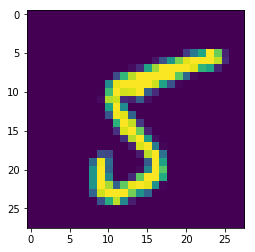

In [162]:
# Пример, как можно визуализировать данные
plt.imshow(train['data'][0].reshape(28,28))

# Обучаем модель

In [163]:
np.random.seed(13)

X = train['data']

In [164]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - mean) / ( std + 0.01)
X = np.hstack( (np.ones( (X.shape[0], 1) ), X) ) 

In [165]:
Y = train['labels']
Y = (Y - 5.5) * 2

In [166]:
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2)

In [167]:
def logloss(y_true, w, x):
    sum = 0
    n = len(y_true)
    for i in range(0, n):
        sum += math.log(1 + math.exp(-y_true[i] * np.dot(w.T,x[i]))) / n
    return sum

def accuracy(y_true, w, x):
    n = len(y_true)
    num_of_accurate = 0
    for i in range(0, n):
        if y_true[i] * np.dot(w.T, x[i]) > 0:
            num_of_accurate += 1
    return num_of_accurate / n

In [168]:
# Реализуйте здесь обучение модели
learn_rate = 0.0001
rlambda = 0.005
epoch_lim = 300

tr_eval = [0] * epoch_lim
te_eval = [0] * epoch_lim

w = np.random.normal(scale=0.001, size = X.shape[1])
for iter in range(epoch_lim):
    for i in range(len(x_train)):
        grad = - y_train[i] * x_train[i] / ( 1 + math.exp( y_train[i] * np.dot(w.T, x_train[i]) ) ) + rlambda * w
        w = w - learn_rate * grad
    tr_eval[iter] = (logloss(y_train, w, x_train), accuracy(y_train, w, x_train))
    te_eval[iter] = (logloss(y_test, w, x_test), accuracy(y_test, w, x_test))

# Оцениваем результат

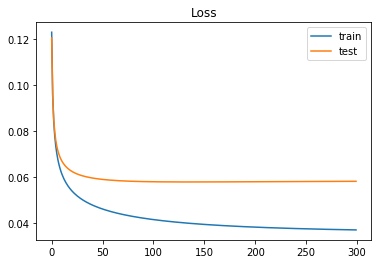

In [169]:
plt.title('Loss')
plt.plot([e[0] for e in tr_eval], label='train')
plt.plot([e[0] for e in te_eval], label='test')
plt.legend()

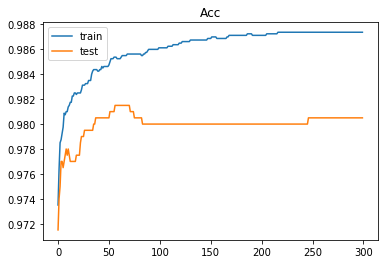

In [170]:
plt.title('Acc')
plt.plot([e[1] for e in tr_eval], label='train')
plt.plot([e[1] for e in te_eval], label='test')
plt.legend()

# Сохраняем данные для кагла

https://www.kaggle.com/t/513ea517806348848dc78c4f41d44528

In [173]:
X = test_no_lables['data']
X = (X - mean) / ( std + 0.01)
X = np.hstack( (np.ones( (X.shape[0], 1) ), X) ) 

# compute Y_pred
Y_pred = [0] * len(X)
for i in range(len(X)):
    Y_pred[i] = 1 / ( 1 + math.exp(-np.dot(w.T, X[i])) )

with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(len(X)):
        print(i, Y_pred[i], sep=',', file=fout)